# Machine Learning Exam 20/04/2025
Workflow
1. Import, data loading, set general variables and visualization
2. Train-test split and generation of the reference estimator
3. Cross-validation with hyperparameter optimization
4. Feature selection with `SelectKBest`
5. Cross-validation with hyperparameter optimization on the reduced dataset after feature selection


## 1. Imports data loading and visualization

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt
from functools import partial
# .....


random_state = 42
cv = 5
test_set_size = 0.33
scoring = 'accuracy'

path = 'spambase.data'

Load the file `spambase.data` into a pandas DataFrame. 

The last column denotes whether the e-mail was considered spam or not, so it's the target of the classification task (class).

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


Separate predicting feature and target, show the respective shapes

(4601, 57) (4601,)


Plot the histograms of the features and the class.

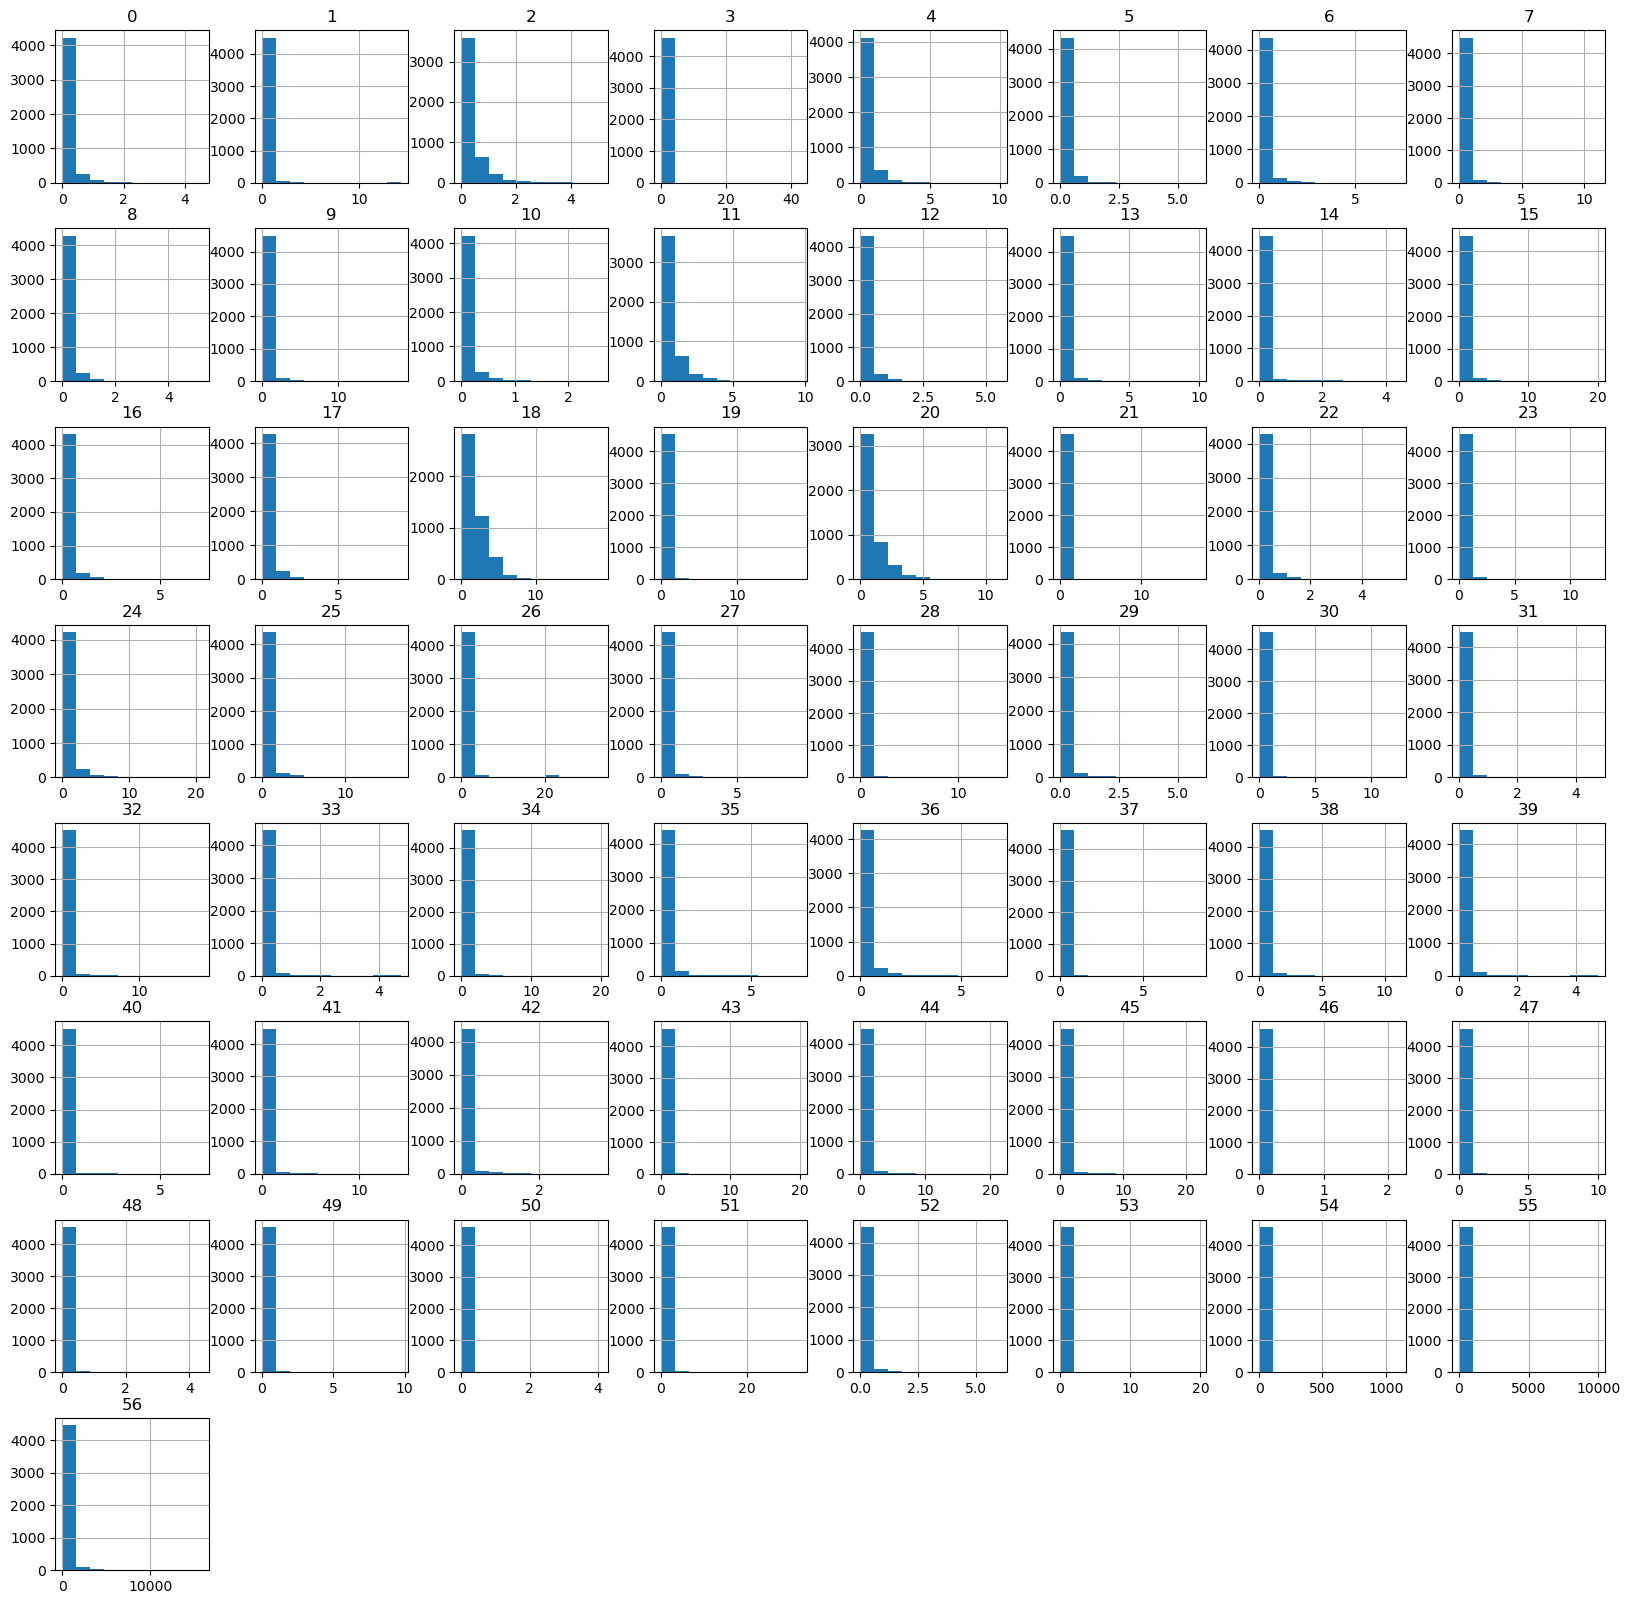

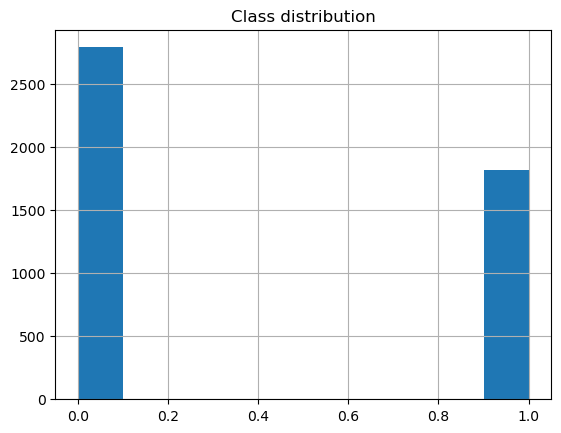

Show the boxplots of the features, split it into two figures if it doesn't fit the page.

<Axes: >

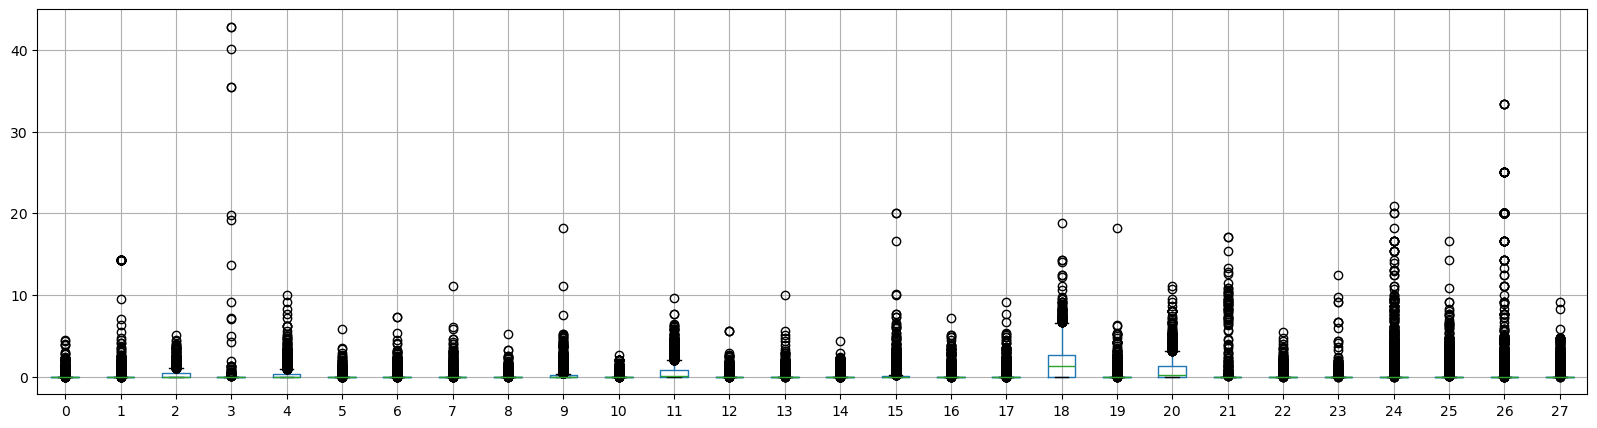

<Axes: >

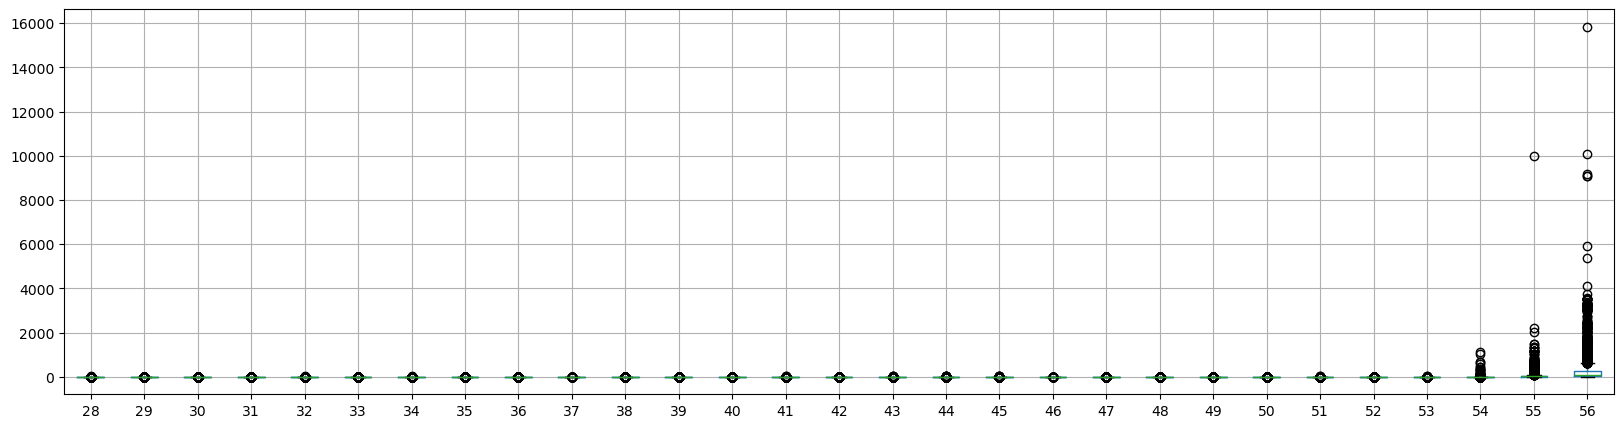

## 2. Train-test split and reference estimator

Split into train and test (`test_size=0.33`), then fit a `DecisionTreeClassifier` and observe its `max_depth`. Initialize the estimator with the parameter `criterion="entropy"`.

Train the reference estimator and show the maximum depth of the unpruned tree

Decision tree max depth: 25


Predict train and test and show the respective accuracies

Training set accuracy 99.97 %
Test set accuracy 91.18 %


## 3. Cross validation with hyperparameter optimization

Tune the `max_depth` and `criterion` hyperparameters using cross validation.

Best parameters found:  {'criterion': 'entropy', 'max_depth': 11}


Fit a `DecisionTreeClassifier` with the best parameter and print the training set score, cross-validation score and the test set score.

Training set accuracy 97.44 %
Best cross-validation accuracy: 91.89%
Test set accuracy 91.18 %


## 4. Feature selection

Create a pipeline with `SelectKBest` (using `mutual_info_classif` as score function) and `DecisionTreeClassifier`, 

Optimize the pipline with cross validation with respect to the number of feaures to keep. For the decision tree use the best parameters found in step 3.

Fit with the best estimator, predict and show all the results.

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

param_grid_p = {
    'kbest__k': list(range(1, X.shape[1] + 1))
}

# pipeline creation
pipeline = Pipeline([
    ('kbest', SelectKBest(score_func=partial(mutual_info_classif, random_state=random_state))),
    ('dt', DecisionTreeClassifier(criterion=best_params['criterion']
                                  ,max_depth=best_params['max_depth']
                                  ,random_state=random_state))
])

Reduced dataset
Best parameters found:  {'kbest__k': 49}
Training set accuracy 97.44 %
Best cross-validation accuracy: 91.95%
Test set accuracy 92.03 %


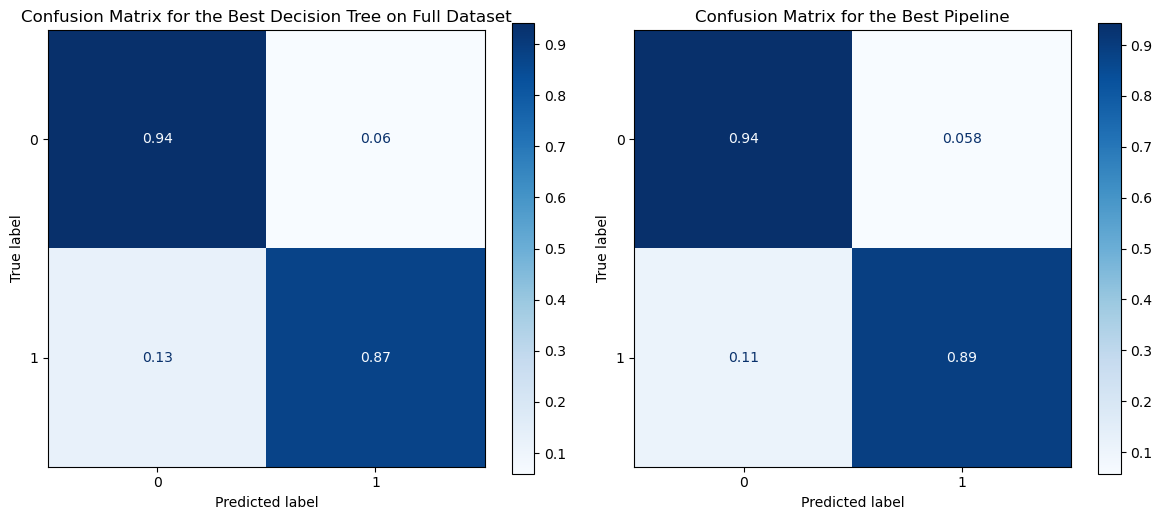